<a href="https://colab.research.google.com/github/PedroRPM/Projeto-cocada/blob/main/Final_ProjetoCOCADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import plotly.graph_objects as go
import copy
import ipywidgets as widgets
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Função para fazer a clusterização
# Entrada: Vetor com os pontos 'Centrais' dos clusters vetores R, G, e B
# Saída: Vetor cluster(indica a qual cluster cada ponto pertence)
def clustering (clusPo, R, G, B):
  dist = []
  cluster = []
  # Calcula qual ponto gerado aleatoriamente está mais próximo
  for j in range(len(R)):
    for i in range(0, len(clusPo), 3):
      dist.append(np.sqrt((R[j]-clusPo[i])**2 + (G[j]-clusPo[i+1])**2 + (B[j]-clusPo[i+2])**2))
    cluster.append(dist.index(min(dist)))
    dist.clear()
  return cluster


# Calcula a média dos pontos em cada cluster
# Entrada: Vetor com o num do cluster de cada ponto, vetores R, G e B
# Saída: Novos pontos 'Centrais' de cluster
def PoAvg(cluster, R, G, B):
  # Vetores que armazenarão os valores de x,y e z separados por cluster
  vx = []
  vy = []
  vz = []

  NewPoints = []

  for i in range(max(cluster)):
    for j in range(len(cluster)):
      if cluster[j] == i:
        vx.append(R[j])
        vy.append(G[j])
        vz.append(B[j])
    NewPoints.append(sum(vx)/len(vx))
    NewPoints.append(sum(vy)/len(vy))
    NewPoints.append(sum(vz)/len(vz))
    vx.clear()
    vy.clear()
    vz.clear()
  return NewPoints


# Clusterização completa
# Entrada: 3 vetores que armazenam as coordenadas x, y e z, respectivamente, de um conjunto de pontos
#          Vetor com pontos 'centrais' dos clusters
# Saída:   Matriz de cluster
#          Vetor com os pontos centrais de cluster
def CompClustering(R, G, B, clusPo):
  oldC = []
  newC = copy.deepcopy(clusPo)

  while oldC != newC:
    oldC = copy.deepcopy(newC)
    mCluster = clustering(clusPo, R, G, B)
    newC = PoAvg(mCluster, R, G, B)

  return mCluster, newC


# Converte imagem para vetores RGB
def imgConverter(image):
  img = Image.open(image)
  img = img.convert('RGB')
  imgArray = np.array(img)
  MR = []
  MG = []
  MB = []
  for i in range(imgArray.shape[0]):
    for j in range(imgArray.shape[1]):
      R,G,B = imgArray[i, j]
      MR.append(R)
      MG.append(G)
      MB.append(B)
  return MR, MG, MB


# Remove os pixels selecionados e transforma os arrays de volta a imagem
# Entrada: vetor de cluster
#          numero de clusters
#          vetores r,g,b
#          dimensões da imagem
# Saída:   Imagem modificada
def modImg(cluster, rc, R, G, B, w, h):
  img = np.zeros((h, w, 3), dtype=np.uint8)
  for i in range(len(cluster)):
    if cluster[i] < rc:
      R[i] = 0
      G[i] = 255
      B[i] = 0
  co = 0
  for j in range(h):
    for k in range(w):
      img[j, k, 0] = R[co]
      img[j, k, 1] = G[co]
      img[j, k, 2] = B[co]
      co = co + 1
  modifiedImg = Image.fromarray(img.astype('uint8'))
  return modifiedImg


# Lê os pontos com as coordenadas separadas por vírgula
# Entrada: tinput de inteiros separados por vírgula ex.: 10, 20, 30
# Saída: vetor com os valores
def ClusterPoints():
  vector = []
  while True:
    c = input("Digite os valores separados por vírgula: \n")
    points = [int(x.strip()) for x in c.split(",")]

    for point in points:
      if point == 1000:
        return vector
      vector.append(point)

Saving file.jpg to file (1).jpg


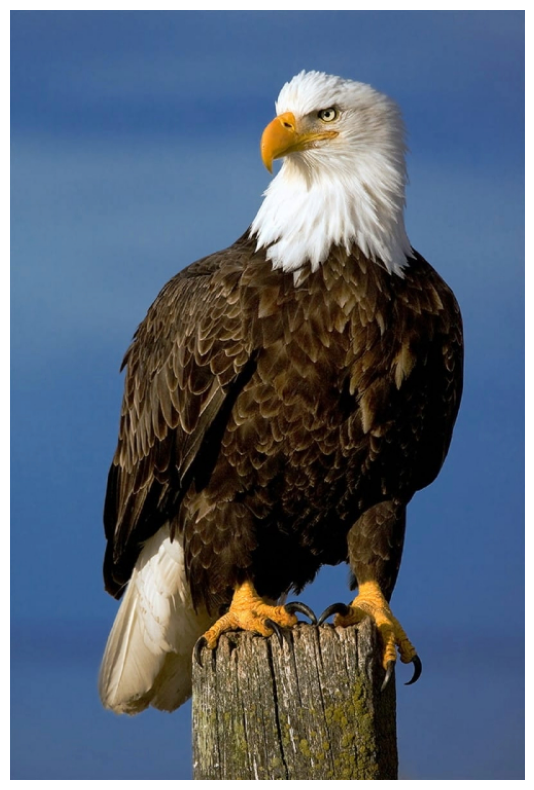

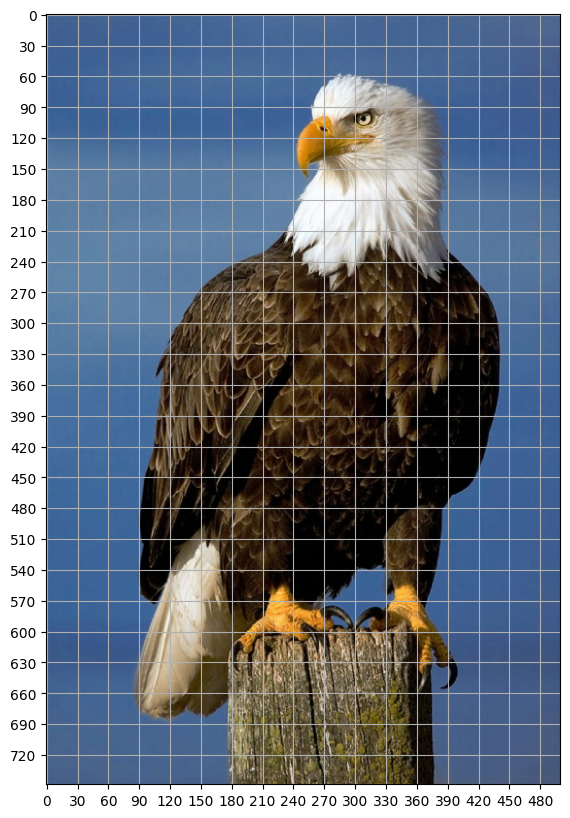

IntSlider(value=0, description='X:', max=499)

IntSlider(value=0, description='Y:', max=748)

Output()

In [4]:
# Carregar imagem
imgUpload = files.upload()
path = next(iter(imgUpload))
img = Image.open(path)
imgRGB = img.convert("RGB")
width, height = img.size


# Exibir a imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis(False)
plt.show()


print('\n\n')


# Exibir a imagem
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.grid(True)
plt.xticks(np.arange(0, width, 30))
plt.yticks(np.arange(0, height, 30))

plt.show()


# Selecionar pixel e visualizar RGB
x_slider = widgets.IntSlider(value=0, min=0, max=img.width - 1, description='X:')
y_slider = widgets.IntSlider(value=0, min=0, max=img.height - 1, description='Y:')

color_box = widgets.Output()

def display_color(x, y):
    with color_box:
        color_box.clear_output()
        rgb = imgRGB.getpixel((x, y))
        print(f"Coordenadas: ({x}, {y}) -> RGB: {rgb}")

        plt.figure(figsize=(2, 2))
        plt.imshow([[rgb]])
        plt.axis("off")
        plt.show()

interactive_display = widgets.interactive(display_color, x=x_slider, y=y_slider)

display(x_slider, y_slider, color_box)

Número de clusters de remoção: 4


Saving Pontos.txt to Pontos.txt


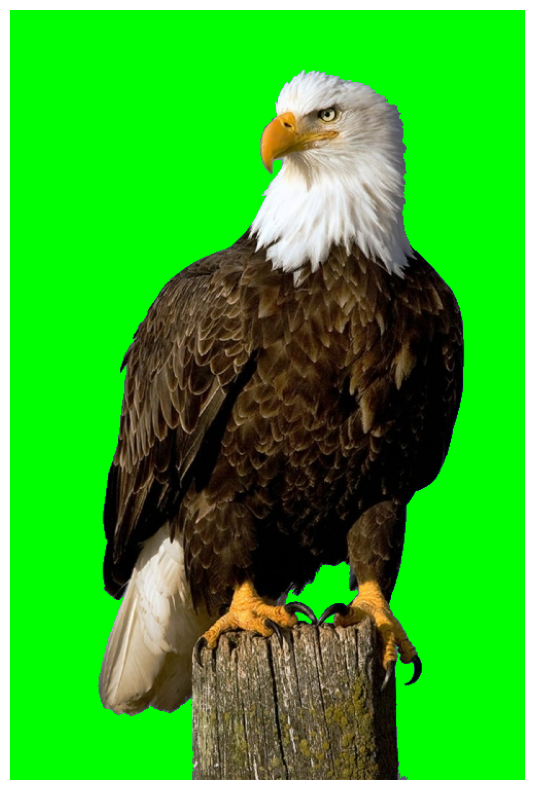

In [5]:
MatR, MatG, MatB = imgConverter(path)

MatR1 = copy.deepcopy(MatR)
MatG1 = copy.deepcopy(MatG)
MatB1 = copy.deepcopy(MatB)


rc = int(input("Número de clusters de remoção: "))

uploaded = files.upload()


# Entrada dos pontos por txt
fileC = list(uploaded.keys())[0]

with open(fileC, 'r') as file:
    content = file.read()

CluPoints = [int(x) for x in content.replace(',', ' ').split()]


vecCluster, CluPoints = CompClustering(MatR, MatG, MatB, CluPoints)

modfiedImg = modImg(cluster=vecCluster, rc=rc, R=MatR, G=MatG, B=MatB, w=width, h=height)


plt.figure(figsize=(10,10))
plt.imshow(modfiedImg)
plt.axis(False)
plt.show()

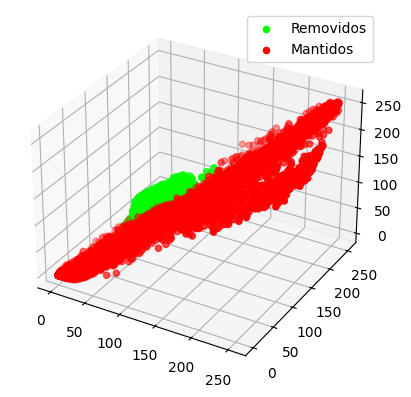

In [7]:
px0 = []
py0 = []
pz0 = []
px1 = []
py1 = []
pz1 = []


for i in range(50000):
  temp = rd.randint(0,(len(MatR1)-1))
  if vecCluster[temp] < rc:
    px0.append(MatR1[temp])
    py0.append(MatG1[temp])
    pz0.append(MatG1[temp])
  else:
    px1.append(MatR1[temp])
    py1.append(MatG1[temp])
    pz1.append(MatG1[temp])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(px0, py0, pz0, color ='#00FF00', marker='o', label = 'Removidos')
ax.scatter(px1, py1, pz1, color ='red', marker='o', label = 'Mantidos')
plt.legend()
plt.show()